# House price estate

## By RASOLOMANANA Hanssi Andrianiaina
## Master I en Mathématiques Informatique et Statistiques Appliquées
### Août 2021

In [1]:
# import needed library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import KNNImputer
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_log_error, make_scorer, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression

from xgboost import XGBRegressor

import time 

import warnings

warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'xgboost'

## The data about the house price that we are gonna use

In [2]:
data = pd.read_csv("property24_data.csv")

## Some exploration of our data

In [3]:
display(data.shape)


(7901, 23)

From the information above, we can see that we got 7901 observations with 23 features each

In [4]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7901 entries, 0 to 7900
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Bathrooms             7812 non-null   float64
 1   Bedrooms              7661 non-null   float64
 2   Erf Size              3635 non-null   object 
 3   Floor Size            5869 non-null   object 
 4   Garages               3732 non-null   float64
 5   Listing Date          7901 non-null   object 
 6   Listing Number        7901 non-null   int64  
 7   Pet Friendly          2026 non-null   float64
 8   Price                 7846 non-null   float64
 9   Town                  7901 non-null   object 
 10  Type of Property      7901 non-null   object 
 11  Garden                2030 non-null   float64
 12  Pool                  2738 non-null   float64
 13  Secure Parking        666 non-null    float64
 14  Parking               3423 non-null   float64
 15  No Pets Allowed      

None

Those are all the feature' s label and their respective type

In [5]:
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
Bathrooms,7812.0,2.059908e+00,1.452088e+00,0.5,1.0,2.0,2.5,30.0
Bedrooms,7661.0,2.615651e+00,1.629366e+00,0.5,2.0,2.0,3.0,33.0
Garages,3732.0,1.641881e+00,9.219943e-01,1.0,1.0,1.0,2.0,20.0
Listing Number,7901.0,1.084730e+08,7.972524e+05,100392643.0,108258251.0,108773652.0,108990121.0,109154455.0
Pet Friendly,2026.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0
Price,7846.0,5.658831e+06,8.081759e+06,199000.0,1850000.0,2995000.0,5990000.0,172500000.0
Garden,2030.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0
Pool,2738.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0
Secure Parking,666.0,2.018018e+00,1.620259e+00,1.0,1.0,2.0,2.0,15.0
Parking,3423.0,1.887526e+00,1.749317e+00,1.0,1.0,1.0,2.0,50.0


#### A sample of the data

In [6]:
display(data.sample(5).T)

,5888,7188,2277,4574,7782
Bathrooms,2.0,1.0,1.0,3.5,1.0
Bedrooms,3.0,1.0,1.0,4.0,1.0
Erf Size,312 m²,NaN,59 m²,740 m²,NaN
Floor Size,NaN,63 m²,59 m²,NaN,52 m²
Garages,2.0,1.0,NaN,2.0,NaN
Listing Date,24 July 2019,16 August 2019,30 July 2020,28 March 2020,12 September 2019
Listing Number,107738417,105967985,108933245,108605239,107937224
Pet Friendly,1.0,NaN,NaN,1.0,NaN
Price,4400000.0,2995000.0,1750000.0,4500000.0,1950000.0
Town,"13 Mains Avenue, Kenilworth Upper, Cape Town","Fresnaye, Cape Town","195 Beach Road, Three Anchor Bay, Cape Town","Constantia, Cape Town","Cape Town City Centre, Cape Town"


## Some preprocessing

*From the information above, we can see that 'Erf Size' and 'Floor Size' should be converted to number and 'Listing Date' should be converted to datetime*

### Standardize columns name

In [7]:
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(r'[?|$|.|!|(|)]',r'', regex=True)
data.columns = data.columns.str.replace(' ', '_')
data.columns

Index(['bathrooms', 'bedrooms', 'erf_size', 'floor_size', 'garages',
       'listing_date', 'listing_number', 'pet_friendly', 'price', 'town',
       'type_of_property', 'garden', 'pool', 'secure_parking', 'parking',
       'no_pets_allowed', 'furnished', 'flatlet', 'fibre_internet',
       'furnished_optional', 'adsl_internet', 'satellite_internet',
       'fixed_wimax_internet'],
      dtype='object')

Convert erf_size to float64

In [9]:
data['erf_size'] = data['erf_size'].str.replace(' ', '')
data['erf_size'] = data['erf_size'].str.replace('m²', '')
data['erf_size'].loc[data['erf_size'].str.contains('ha', na=False)]
# convert ha into m²
data['erf_size'] = data['erf_size'].str.replace('ha', '0000')
data['erf_size'] = data['erf_size'].astype(float)

AttributeError: Can only use .str accessor with string values!

Convert floor_size to float

In [10]:
data['floor_size'] = data['floor_size'].str.replace(' ', '')
data['floor_size'] = data['floor_size'].str.replace('m²', '')
data['floor_size'] = data['floor_size'].astype(float)

Convert listing_date to datetime

In [11]:
def formatDate(datestr) :
    date =  datestr.split()
    date[1] = date[1][0:3]
    return ''.join(date)

data['listing_date'] = data['listing_date'].apply(formatDate)
data['listing_date'] = pd.to_datetime(data['listing_date'], format='%d%b%Y')
data['listing_date'].head().T

0   2020-07-10
1   2020-09-23
2   2020-09-23
3   2020-09-23
4   2020-07-23
Name: listing_date, dtype: datetime64[ns]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7901 entries, 0 to 7900
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   bathrooms             7812 non-null   float64       
 1   bedrooms              7661 non-null   float64       
 2   erf_size              3635 non-null   float64       
 3   floor_size            5869 non-null   float64       
 4   garages               3732 non-null   float64       
 5   listing_date          7901 non-null   datetime64[ns]
 6   listing_number        7901 non-null   int64         
 7   pet_friendly          2026 non-null   float64       
 8   price                 7846 non-null   float64       
 9   town                  7901 non-null   object        
 10  type_of_property      7901 non-null   object        
 11  garden                2030 non-null   float64       
 12  pool                  2738 non-null   float64       
 13  secure_parking    

## Some visualization of our data to understand it 

### Price distribution

/home/mirindra/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


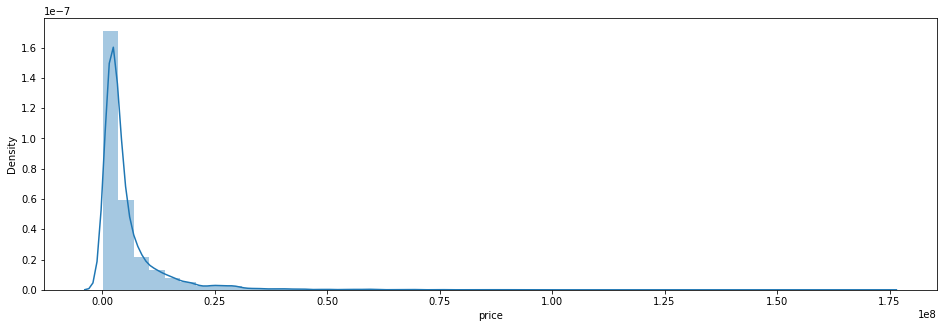

In [13]:
# data['price'].plot.hist(bins=200, rwidth=0.5, figsize=(20,10))
plt.figure(figsize=(16,5))
# plt.subplot(1,2,1)
sns.distplot(data['price'])
plt.show()

### Outlier visualization

<AxesSubplot:xlabel='price'>

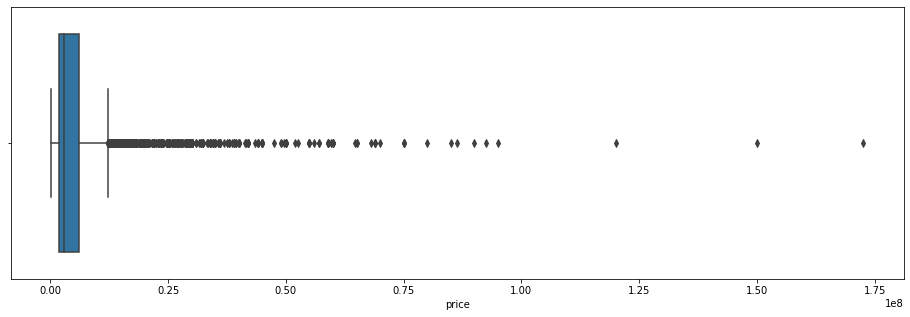

In [14]:
plt.figure(figsize=(16,5))
sns.boxplot(x=data['price'])

/home/mirindra/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

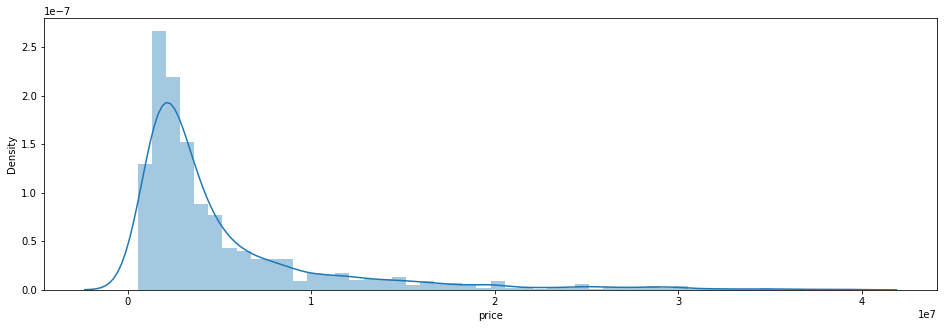

In [15]:
upper_price_limit = data['price'].quantile(0.99)
lower_price_limit = data['price'].quantile(0.01)

# removing outlier
new_data = data[(data['price'] <= upper_price_limit) & (data['price'] >= lower_price_limit)]

plt.figure(figsize=(16,5))
sns.distplot(new_data['price'])
# sns.boxplot(new_data['price'])

In [16]:
data = new_data

### House number per type

In [ ]:
data['type_of_property'].value_counts().plot(kind='barh')

### Features correlations

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
corr_matrix = data.corr(method='spearman').abs()
sns.heatmap(corr_matrix, annot=True, linewidths=1, ax=ax,center=0)

The correlation matrix is full of empty value because of the NaN in the data. We will fix that later but we are going to handle object columns first

## Data cleaning

### Remove duplicated row or row missing too much features

In [ ]:
print("%d observations with %d dupicated row"%(data.shape[0], data.duplicated().sum()))

In [ ]:

print("Droping duplicated row ...")
data.drop_duplicates(keep = 'first', inplace=True)


In [35]:
print("%d observations with %d duplicated row"%(data.shape[0], data.duplicated().sum()))

NameError: name 'data' is not defined

In [ ]:
row_null_count = data.isnull().sum(axis=1)
row_null_count.describe()

In [ ]:
# drop row which are missing more than 80% of features
row_percentage_miss = row_null_count/data.shape[1]
index_to_drop = data[row_percentage_miss > 0.8].index
index_to_drop

In [ ]:
data = data.drop(index_to_drop)
data.shape

In [ ]:
print("Ended with %d observations"%(data.shape[0]))

### Handle object columns

In [36]:
obj_col = data.select_dtypes('object').columns
obj_col

NameError: name 'data' is not defined

In [ ]:
for col in obj_col :
    print("Feature %s has %d uniques values"%(col, data[col].nunique()))

#### Handling 'type_of_property' feature

In [ ]:
print("The feature 'type_of_property' has %d uniques values which are %s"%(data['type_of_property'].nunique(), ', '.join(data['type_of_property'].unique()) ) )

*Encoding type_of_property with oneHotEncoder*

In [ ]:
# standardize values before encoding
data['type_of_property'] = data['type_of_property'].str.lower()
data['type_of_property'] = data['type_of_property'].str.replace(' ','')
data['type_of_property'] = data['type_of_property'].str.replace('/','_')
data['type_of_property'].unique()

In [ ]:
# encoding using oneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

# encode type_of_property
type_encoded = pd.DataFrame(enc.fit_transform(data[['type_of_property']]))
type_encoded.columns = enc.get_feature_names(['type'])
print(type_encoded.shape)
# merge with data
data.reset_index(drop=True, inplace=True)
type_encoded.reset_index(drop=True, inplace=True)
data = pd.concat([data, type_encoded], axis=1)

data.drop(columns=['type_of_property'], inplace=True)

In [ ]:
data.info()

#### Handling 'town' feature

In [37]:
display(data['town'].isna().sum())
display(data['town'].unique())

NameError: name 'data' is not defined

Town value all end with 'Cape Town' since the data was collected from Cape Town. It' s irrevelant so we  can just remove it

In [ ]:
# Check if some observation are not from Cape Town
notCapeTown = data[~data.town.str.contains('Cape Town', na=False)]
notCapeTown['town'].unique()

In [ ]:
town = data['town'].str.replace(', Cape Town', '') # remove Cape Town in town columns
print(town.nunique(), " unique values in town columns")
town.head()

*Actually the town columns contains the street address of the house so we have to separate the street address and the suburb to better represent the data*

The suburb should be enough to represent the data so we can drop the other data. Usually, suburb/neighborhood is what matter the most when pricing a house based on its address

In [ ]:
town = town.str.split(',').str[-1]
town.head()


In [ ]:
# convert town into new dataframe
location = pd.DataFrame(town.tolist(), columns = ['suburb'])
location['suburb'] = location['suburb'].str.strip() # remove space 
location['suburb'] = location['suburb'].str.lower() # to lower case 
location['suburb'].head()

Let' s join the suburb columns to our data 

In [ ]:
# merge with data
data = pd.concat([data, location], axis=1)
data.drop(columns=['town'], inplace=True)
display(data.head())

Let' s check if we can assemble some category of suburb

In [38]:
data.groupby(['suburb'])['price'].mean().plot(kind='barh', figsize=(20,40))

NameError: name 'data' is not defined

In [ ]:
suburb = data['suburb'].unique()
suburb = suburb.astype(str)
suburb.sort()
print("Location suburb has %d unique values which are :"%len(suburb))
print(suburb)

There is a lot of suburb value containing 'city centre' and from the graph above, we can see that their mean price is not so different. Let' s assemble them in the same category 'city centre'

In [ ]:
data.loc[data['suburb'].str.contains('city centre', case = False, na = False), 'suburb'] = "city centre"

In [ ]:
suburb = data['suburb'].unique()
suburb = suburb.astype(str)
suburb.sort()
print("Location suburb has %d unique values which are :"%len(suburb))
print(suburb)

Encoding suburb with OneHotEncoder

In [ ]:
# encoding using oneHotEncoder
enc_suburb = OneHotEncoder(handle_unknown='ignore', sparse=False)

# remove space in suburb before encoding
data['suburb'] = data['suburb'].str.replace(' ', '_')
data['suburb'].fillna('unknow', inplace=True)

In [ ]:
# find most frequent town 
data['suburb'].value_counts().sort_values(ascending=False).head(20)

In [39]:
top_town = [x for x in data['suburb'].value_counts().sort_values(ascending=False).head(10).index]
top_town

NameError: name 'data' is not defined

In [ ]:
# make binary of labels
# for label in top_town:
#     data[label] = np.where(data['suburb']==label,1,0)

# data[['suburb']+top_town]

In [ ]:
# encode suburb
suburb_encoded = pd.DataFrame(enc_suburb.fit_transform(data[['suburb']]))
suburb_encoded.columns = enc_suburb.get_feature_names(['suburb'])

# merge with data
data.reset_index(drop=True, inplace=True)
suburb_encoded.reset_index(drop=True, inplace=True)
data = pd.concat([data, suburb_encoded], axis=1)

data.drop(columns=['suburb'], inplace=True)

### Our data so far

In [ ]:
data.head()

In [ ]:
data.info()

## Handling missing value

In [40]:
def missing(data) : 
    missing_value_count = data.isnull().sum()
    missing_value = missing_value_count[missing_value_count > 0] # show columns with missing values

    for index in missing_value.index :
        boolean = False 
        if data[index].nunique() <= 2 :
            boolean = True 
        print("Column '%s' have %d missing value with type %s"%(index, missing_value[index], "boolean "+str(data[index].unique()) if boolean else "numeric"))
    return missing_value

missing_value = missing(data)

NameError: name 'data' is not defined

### Handling boolean type missing value

In [ ]:
# We can assume that if value is missing in 
# ['fixed_wimax_internet', 'satellite_internet', 'adsl_internet','fibre_internet', 'flatlet', 'pool', 'garden', 'pet_friendly', 'furnished']
# then the feature is missing from the house therefor false
data['fixed_wimax_internet'].fillna(0, inplace=True)
data['satellite_internet'].fillna(0, inplace=True)
data['adsl_internet'].fillna(0, inplace=True)
data['fibre_internet'].fillna(0, inplace=True)
data['flatlet'].fillna(0, inplace=True)
data['pool'].fillna(0, inplace=True)
data['garden'].fillna(0, inplace=True)
data['pet_friendly'].fillna(0, inplace=True)
data['furnished'].fillna(0, inplace=True)

'no_pets_allowed' and 'pet_friendly' are obviously related. 

A pet friendly house obviously allow pets, i.e pet_friendly true mean no_pets_allowed false

In [ ]:
def noPetFromPetFriendly(row) :
    if row['pet_friendly'] == 1 :
        return 0 
    return row['no_pets_allowed']

data['no_pets_allowed'] = data.apply(lambda row : noPetFromPetFriendly(row), axis=1)

'furnished' and 'furnished_optional' are also related.

A furnished house is optionaly furnished

In [41]:
def furnishing(row) :
    if row['furnished'] == 1 :
        return 1
    else :
        return row['furnished_optional']

data['furnished_optional'] = data.apply(lambda row : furnishing(row), axis=1)

NameError: name 'data' is not defined

In [ ]:
# for the rest of the boolean feature, we can assume that further missing values are false 
data['no_pets_allowed'].fillna(0, inplace=True)
data['furnished_optional'].fillna(0, inplace=True)

In [42]:
missing_value = missing(data)

NameError: name 'data' is not defined

### Handling numerical missing value

**We must separate the data into train and test value before proceeding**

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=1)
print("Date separated into train data and test data with respectively %d and %d observations and %d features each"%(train.shape[0], test.shape[0], train.shape[1]))

Let' s use KNNImputer from sklearn to fill the missing numerical_data

In [ ]:
# convert date to numeric
# just extract the month and year 
train['listing_year'] = train['listing_date'].dt.year
train['listing_month'] = train['listing_date'].dt.month
train.drop(columns=['listing_date'], inplace=True)

test['listing_year'] = test['listing_date'].dt.year
test['listing_month'] = test['listing_date'].dt.month
test.drop(columns=['listing_date'], inplace=True)

In [43]:
# preparing data for Imputer 

# apply log to price

# train['price'] = train['price'].apply(np.log)
# test['price'] = test['price'].apply(np.log)

# scaling data to avoid biased imputation
# scaler = StandardScaler()
# train_scaled = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
# test_scaled = pd.DataFrame(scaler.fit_transform(test), columns=test.columns)


imputer = KNNImputer(n_neighbors=3)

train_knn_filled = pd.DataFrame(imputer.fit_transform(train), columns=train.columns)

test_knn_filled = pd.DataFrame(imputer.fit_transform(test), columns=test.columns)


NameError: name 'train' is not defined

In [ ]:
missing(train_knn_filled)

In [ ]:
missing(test_knn_filled)

In [44]:
train_knn_filled.head()

NameError: name 'train_knn_filled' is not defined

In [ ]:
test_knn_filled.head()

## Separate feature target

In [ ]:
X_train = train_knn_filled.drop(columns=['price'])
y_train = train_knn_filled['price'].apply(np.log)

X_test = test_knn_filled.drop(columns=['price'])
y_test = test_knn_filled['price'].apply(np.log)

## Model selection 

In [ ]:
# a function to test a model
def testModel(model, scorer, cv,X,y) :
    grid = GridSearchCV(estimator = model, param_grid={}, scoring = scorer, cv = cv, n_jobs=-1)
    grid.fit(X, y) # train model
    print("Model cross-validation score(RMSE) : ", grid.best_score_) # give model score
    return grid 

def tuneModel(model, params, cv, X, y, randomSearch=False, n_iter=20) :
    tuned_model = None
    if randomSearch :
        tuned_model = RandomizedSearchCV(estimator = model, param_distributions=params, n_iter=n_iter, cv = cv)
    else : 
        tuned_model = GridSearchCV(estimator = model, param_grid = params, cv = cv)
    # start model training and time it 
    print("Tuning model. Please wait ...")
    start_time = time.process_time()
    tuned_model.fit(X, y)
    # best_estimator = tuned_model.best_estimator_
    # best_params = best_estimator.get_params()
    # test_random = testModel(best_estimator, scorer, cv, X, y)
    # print("RandomSearchCV done. Best score %f with hyperparameters"%test_random.best_score_ , best_params)

    # # grid search around given parameters
    # grid_plus = {}
    # for key in params :
    #     print("key : ",key)
    #     p = best_params[key]
    #     diff = 0  
    #     if not isinstance(p, (int, float)) :
    #         continue 
    #     diff = p * 0.1
    #     n_value = np.linspace(p-diff, p+diff, num=3)
    #     grid_plus[key] = n_value

    # print("GridSearchCv around ",grid_plus)

    # tuned_model_plus = GridSearchCV(estimator = model, param_grid = grid_plus, cv = cv)
    # tuned_model_plus.fit(X, y)

    print("Training time : %f seconds"%(time.process_time()-start_time))

    return tuned_model


def evaluateModel(model, loss, X,y) :
    print("Evaluating model using test set...")
    y_pred = model.predict(X)
    print('Model evaluation score(RMSE) : ', loss(y, y_pred, squared=False))

def modelPipe(model, params, scorer, loss, cv, X, y, X_test, y_test, randomSearch=False, n_iter=20):
    print("Testing model...")
    testModel(model, scorer, cv,X,y) 
    tuned_model = tuneModel(model, params, cv, X, y, randomSearch=randomSearch, n_iter=n_iter)
    best_model = tuned_model.best_estimator_
    print("Best model : ", best_model)
    evaluateModel(best_model, loss, X_test, y_test)
    return best_model


### Model 1 : Trying a simple linear model without droping a single feature


In [ ]:
cv = 10

model_1 = Ridge()

alphas = np.linspace(0,0.2,20)
param_grid_1 = {'alpha' : alphas}

scorer = make_scorer(mean_squared_error, squared=False)

In [45]:
best_model_1 = modelPipe(
    model=model_1,
    params=param_grid_1,
    scorer=scorer,
    loss=mean_squared_error,
    cv=cv,
    X=X_train,
    y=y_train,
    X_test=X_test,
    y_test=y_test,
    randomSearch=False,
    n_iter=20
)

NameError: name 'X_train' is not defined

Let' s try an ensemble model before doing a feature selection

### model 2 : ensemble model

In [ ]:
model_2 = RandomForestRegressor(n_jobs=-1, random_state = 0, bootstrap=True)
# n_estimator : the number of tree
# max_features : the size of the subset of features to consider for splitting a node

param_grid_2 =  {'n_estimators':[200, 300, 400, 500, 600],
               'max_features':[0.1, 0.3, 0.6]
              }

In [ ]:
best_model_2 = modelPipe(
    model=model_2,
    params=param_grid_2,
    scorer=scorer,
    loss=mean_squared_error,
    cv=cv,
    X=X_train,
    y=y_train,
    X_test=X_test,
    y_test=y_test,
    randomSearch=True,
    n_iter=20
)

### Model 3 : gradient boosting 

In [ ]:
model_3 = XGBRegressor()

param_grid_3 = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

In [ ]:
best_model_3 = modelPipe(
    model=model_3,
    params=param_grid_3,
    scorer=scorer,
    loss=mean_squared_error,
    cv=cv,
    X=X_train,
    y=y_train,
    X_test=X_test,
    y_test=y_test,
    randomSearch=True,
    n_iter=20
)

## Feature selection

Let's see how the features are correlated to the price

In [46]:
train_knn_filled.columns[~train_knn_filled.columns.str.contains('suburb')]

NameError: name 'train_knn_filled' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(30,22))
corr_matrix = train_knn_filled[['bathrooms', 'bedrooms', 'erf_size', 'floor_size', 'garages',
       'listing_number', 'pet_friendly', 'price', 'garden', 'pool',
       'secure_parking', 'parking', 'no_pets_allowed', 'furnished', 'flatlet',
       'fibre_internet', 'furnished_optional', 'adsl_internet',
       'satellite_internet', 'fixed_wimax_internet', 'type_apartment_flat',
       'type_house', 'type_townhouse', 'listing_year', 'listing_month']].corr(method = "spearman").abs()
sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax,center=0)

In [ ]:
# the most correlated with price 
price_corr = train_knn_filled.corr(method = "spearman")['price'].abs().sort_values(ascending=False)
price_corr = price_corr > 0.2
price_corr

In [ ]:
train_most_corr = train_knn_filled[price_corr.index[price_corr]]
test_most_corr = test_knn_filled[price_corr.index[price_corr]]
display(train_most_corr.head())
display(test_most_corr.head())

In [47]:
# separate target feature
X_train_2 = train_most_corr.drop(columns=['price'])
y_train_2 = train_most_corr['price'].apply(np.log)

X_test_2 = test_most_corr.drop(columns=['price'])
y_test_2 = test_most_corr['price'].apply(np.log)


NameError: name 'train_most_corr' is not defined

### Model 4 : linear model using most correlated feature (Spearman rank)

In [ ]:
model_4 = Ridge()

alphas = np.linspace(0,0.2,20)
param_grid_4 = {'alpha' : alphas}


In [ ]:
best_model_4 = modelPipe(
    model=model_4,
    params=param_grid_4,
    scorer=scorer,
    loss=mean_squared_error,
    cv=cv,
    X=X_train_2,
    y=y_train_2,
    X_test=X_test_2,
    y_test=y_test_2,
    randomSearch=False,
    n_iter=20
)

### model 5 : ensemble model using most correlated feature (Spearman rank)

In [ ]:
model_5 = RandomForestRegressor(n_jobs=-1, random_state = 0, bootstrap=True)
# n_estimator : the number of tree
# max_features : the size of the subset of features to consider for splitting a node

param_grid_5 =  {'n_estimators':[200, 300, 400, 500, 600],
               'max_features':[0.1, 0.3, 0.6]
              }

In [ ]:
best_model_5 = modelPipe(
    model=model_5,
    params=param_grid_5,
    scorer=scorer,
    loss=mean_squared_error,
    cv=cv,
    X=X_train_2,
    y=y_train_2,
    X_test=X_test_2,
    y_test=y_test_2,
    randomSearch=True,
    n_iter=20
)

### Model 6 : gradient boosting using most correlated feature (Spearman rank)

In [48]:
model_6 = XGBRegressor()

param_grid_6 = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

NameError: name 'XGBRegressor' is not defined

In [ ]:
best_model_6 = modelPipe(
    model=model_6,
    params=param_grid_6,
    scorer=scorer,
    loss=mean_squared_error,
    cv=cv,
    X=X_train_2,
    y=y_train_2,
    X_test=X_test_2,
    y_test=y_test_2,
    randomSearch=True,
    n_iter=20
)

## Model using K-best features based on sklearn.feature_selection

In [ ]:
selector = SelectKBest(f_regression, k=20) # select 30 best features
selector.fit(X_train, y_train)

best_columns = selector.get_support(indices=True)
X_best_train = X_train.iloc[:, best_columns]
X_best_test = X_test.iloc[:, best_columns]

y_best_train = y_train
y_best_test = y_test

In [ ]:
X_best_train.head()

In [ ]:
X_best_test.head()

### model 7 : linear model using k-best features

In [49]:
model_7 = Ridge()

alphas = np.linspace(0,0.2,20)
param_grid_7 = {'alpha' : alphas}

In [50]:
best_model_7 = modelPipe(
    model=model_7,
    params=param_grid_7,
    scorer=scorer,
    loss=mean_squared_error,
    cv=cv,
    X=X_best_train,
    y=y_best_train,
    X_test=X_best_test,
    y_test=y_best_test,
    randomSearch=False,
    n_iter=20
)

NameError: name 'X_best_train' is not defined

### model 8 : ensemble model using k-best features

In [ ]:
model_8 = RandomForestRegressor(n_jobs=-1, random_state = 0, bootstrap=True)
# n_estimator : the number of tree
# max_features : the size of the subset of features to consider for splitting a node

param_grid_8 =  {'n_estimators':[200, 300, 400, 500, 600],
               'max_features':[0.1, 0.3, 0.6]
              }

In [51]:
best_model_8 = modelPipe(
    model=model_8,
    params=param_grid_8,
    scorer=scorer,
    loss=mean_squared_error,
    cv=cv,
    X=X_best_train,
    y=y_best_train,
    X_test=X_best_test,
    y_test=y_best_test,
    randomSearch=True,
    n_iter=20
)

NameError: name 'X_best_train' is not defined

### model 9 : gradient boosting using k-best features

In [ ]:
model_9 = XGBRegressor()

param_grid_9 = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

In [52]:
best_model_9 = modelPipe(
    model=model_9,
    params=param_grid_9,
    scorer=scorer,
    loss=mean_squared_error,
    cv=cv,
    X=X_best_train,
    y=y_best_train,
    X_test=X_best_test,
    y_test=y_best_test,
    randomSearch=True,
    n_iter=20
)

NameError: name 'model_9' is not defined

# Conclusion 

Let' s consider only the linear Ridge model
* Using all features, we got an RMSE of 0.3552807454084645 on the validation set and 0.34664475230513025 on the test set
* Using all features with a correlation greater than 0.2 with the price, we got an RMSE of 0.5015624919253907 on the validation set and 0.49255839670824575 on the test set
* Using sklearn feature selection library and selecting the 20 features having the highest f_regression score with the price, we got an RMSE of 0.46912197034248304 on the validation set and 0.4685339502097767 on the test set


We can see the using all features give us a better linear model.
